In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils.plotting import plot_dataset

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split


In [2]:
# Load Dataset
df = pd.read_csv('data/ex.csv')

dataset = df.copy()

X = dataset.values
x_cords = dataset['x'].values
y_cords = dataset['y'].values

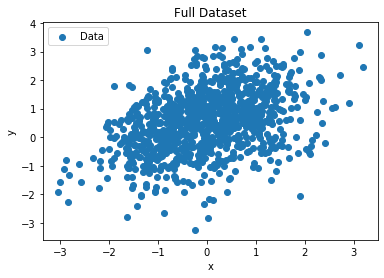

In [3]:
plot_dataset(x_cords, y_cords, 'Full Dataset')

### Split the data into train and test

Now split the dataset into a training set and a test set.
Use the test set in the final evaluation of the model.

### Split features from labels
Separate the target value, the "label", from the features. This label is the value that you will train the model to predict.

In [4]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x_cords, y_cords, test_size=0.20, random_state=np.random.seed(6))

X = np.stack((x_test, y_test), axis=1)

### A DNN regression

The previous section implemented linear models for single and multiple inputs.

This section implements single-input DNN model. The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

- The normalization layer.
- Two hidden, nonlinear, `Dense` layers using the `relu` onlinearity.
- A linear single-output layer.

It will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [5]:
def build_and_compile_model():
    model = tf.keras.Sequential([
        layers.Dense(50, activation='elu', input_dim=1),
        layers.Dense(50, activation='elu'),
        layers.Dense(50, activation='elu'),
        layers.Dense(1)
    ])

    model.compile(loss='logcosh',
                  optimizer=tf.keras.optimizers.Adam(lr=1e-3),
                  metrics=['MAE'])
    return model

In [6]:
model = build_and_compile_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [7]:
%%time
history = model.fit(
    x_train, 
    y_train,
    batch_size = 64,
    validation_split=0.2,
    verbose=0, 
    epochs=200
)

Wall time: 11 s


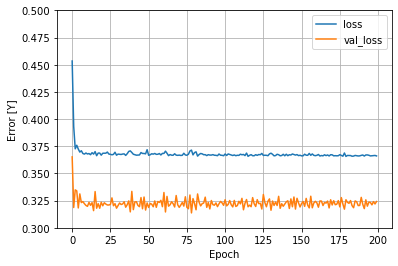

In [8]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.3, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Y]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

Loss: [0.36476422905921935, 0.7627581]


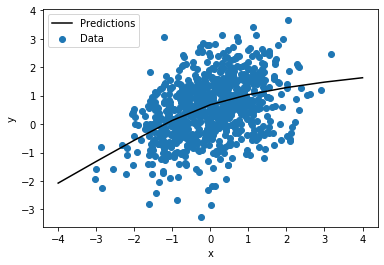

In [9]:
test_results = model.evaluate(
    x_test, y_test, verbose=0)

x = tf.linspace(-4.0, 4.0, 9)
y = model.predict(x)

def plot_model(x, y):
  plt.scatter(x_train, y_train, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

plot_model(x, y)

print(f"Loss: {test_results}")
